<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Introduction</center></h1>
</div>

**Safe and readily available water** is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation, and better management of water resources, can *boost* countries’ economic growth and can contribute greatly to poverty reduction.

Contaminated water and poor sanitation are linked to transmission of diseases such as **cholera, diarrhoea, dysentery, hepatitis A, typhoid, and polio**. Absent, inadequate, or inappropriately managed water and sanitation services expose individuals to preventable health risks. This is particularly the case in health care facilities where both patients and staff are placed at additional risk of infection and disease when water, sanitation, and hygiene services are lacking. Globally, **15%** of patients develop an infection during a hospital stay, with the proportion much greater in low-income countries.

So, I took some inspiration from this to use this **Water Quality** dataset to understand what consitutes to safe, Potable water and apply machine learning to it to distinguish between Potable and Non-Potable water.

<div style="background-color:#B4DBE9;">
    <center><img src="https://raw.githubusercontent.com/jaykumar1607/Water-Quality/main/water_sanitation.gif">
</div>

<div class="alert alert-block alert-info">
<h4>If you like this notebook, feel free to upvote it! Comment down your suggestions/opinions, I get to learn alot from them and it's very valuable to me! Thanks you! :D</h3>
</div>

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Feature Description</center></h1>
</div>

1. **ph**: pH of 1. water (0 to 14).

2. **Hardness**: Capacity of water to precipitate soap in mg/L.

3. **Solids**: Total dissolved solids in ppm.

4. **Chloramines**: Amount of Chloramines in ppm.

5. **Sulfate**: Amount of Sulfates dissolved in mg/L.

6. **Conductivity**: Electrical conductivity of water in μS/cm.

7. **Organic_carbon**: Amount of organic carbon in ppm.

8. **Trihalomethanes**: Amount of Trihalomethanes in μg/L.

9. **Turbidity**: Measure of light emiting property of water in NTU.

10. **Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Libraries</center></h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Colors</center></h1>
</div>

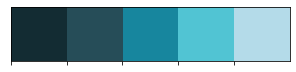

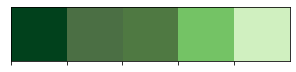

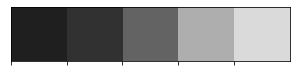

In [2]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Importing The Dataset</center></h1>
</div>

In [3]:
df=pd.read_csv('../input/water-potability/water_potability.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Visualizations</center></h1>
</div>

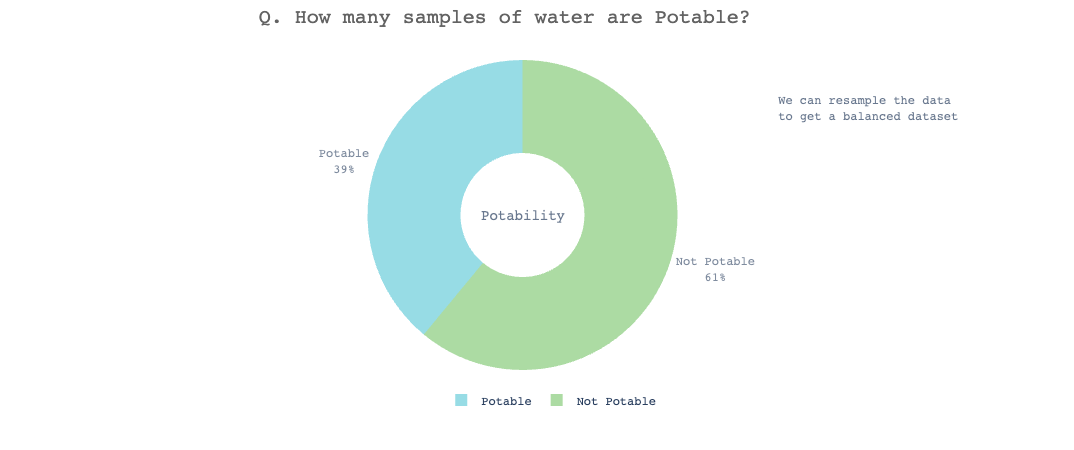

In [6]:
d= pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],colors_blue[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Let's check out the distribution of the features.

**Hardenss of water**: The simple definition of water hardness is the amount of dissolved calcium and magnesium in the water. Hard water is high in dissolved minerals, largely calcium and magnesium. You may have felt the effects of hard water, literally, the last time you washed your hands. Depending on the hardness of your water, after using soap to wash you may have felt like there was a film of residue left on your hands. In hard water, soap reacts with the calcium (which is relatively high in hard water) to form "soap scum". When using hard water, more soap or detergent is needed to get things clean, be it your hands, hair, or your laundry.

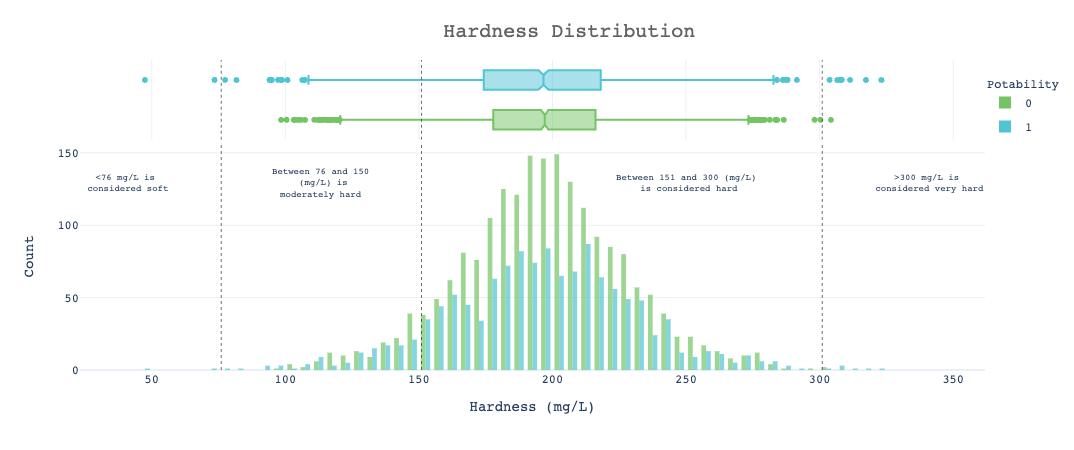

In [7]:
fig = px.histogram(df,x='Hardness',y=Counter(df['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**pH level:** The  pH  of  water  is  a  measure  of  the  acid–base  equilibrium  and,  in  most  natural  waters,   is   controlled   by   the   carbon   dioxide–bicarbonate–carbonate   equilibrium   system. An increased carbon dioxide concentration will therefore lower pH, whereas a decrease will cause it to rise. Temperature will also affect the equilibria and the pH. In pure  water,  a  decrease  in  pH  of  about  0.45  occurs  as  the  temperature  is  raised  by  25  °C.  In  water  with  a  buffering  capacity  imparted  by  bicarbonate,  carbonate  and  hydroxyl  ions,  this  temperature  effect  is  modified  (APHA,  1989).  The  pH  of  most  drinking-water lies within the range 6.5–8.5. Natural waters can be of lower pH, as a result of, for example, acid rain or higher pH in limestone areas.

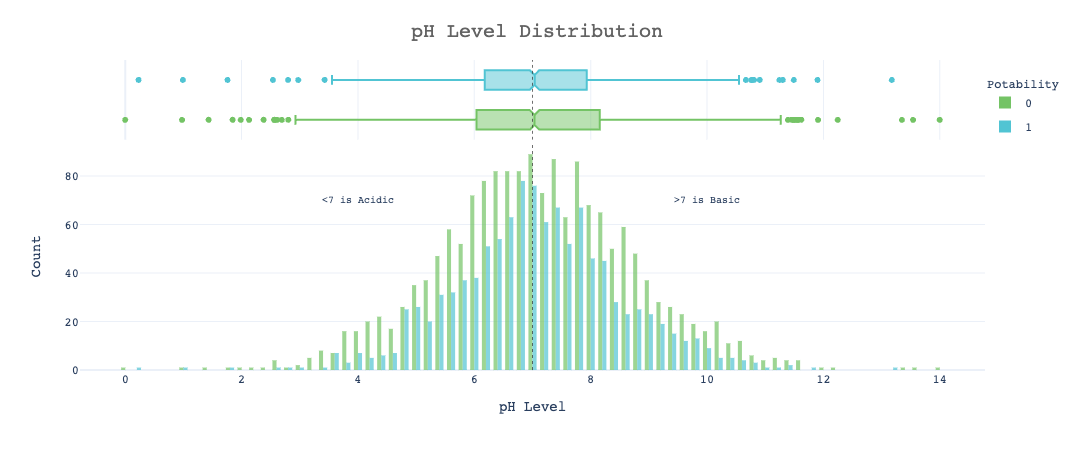

In [8]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**TDS**: TDS means concentration of dissolved particles or solids in water. TDS comprises of inorganic salts such as calcium, magnesium, chlorides, sulfates, bicarbonates, etc, along with many more inorganic compounds that easily dissolve in water. 

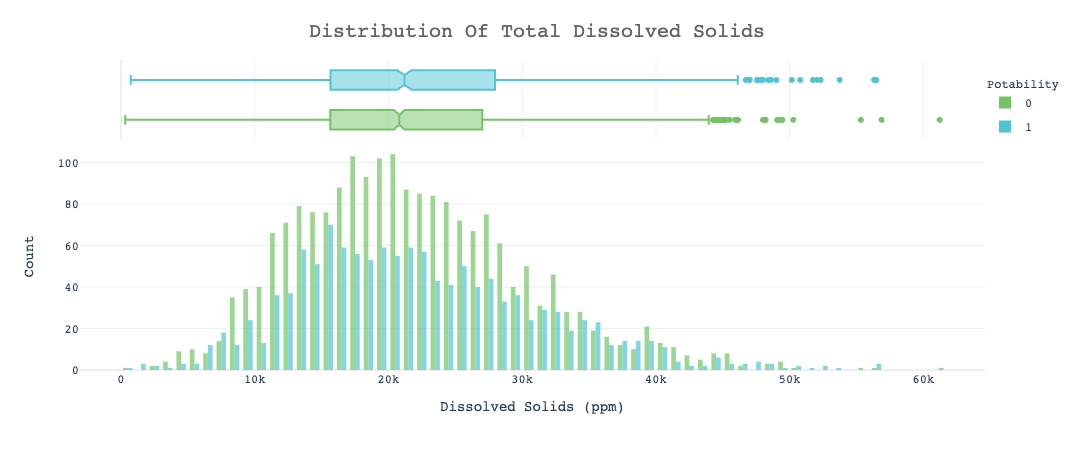

In [9]:
fig = px.histogram(df,x='Solids',y=Counter(df['Solids']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Chloramines**: Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water and they:

* Are most commonly formed when ammonia is added to chlorine to treat drinking water.
* Provide longer-lasting disinfection as the water moves through pipes to consumers.

Chloramines have been used by water utilities since the 1930s.

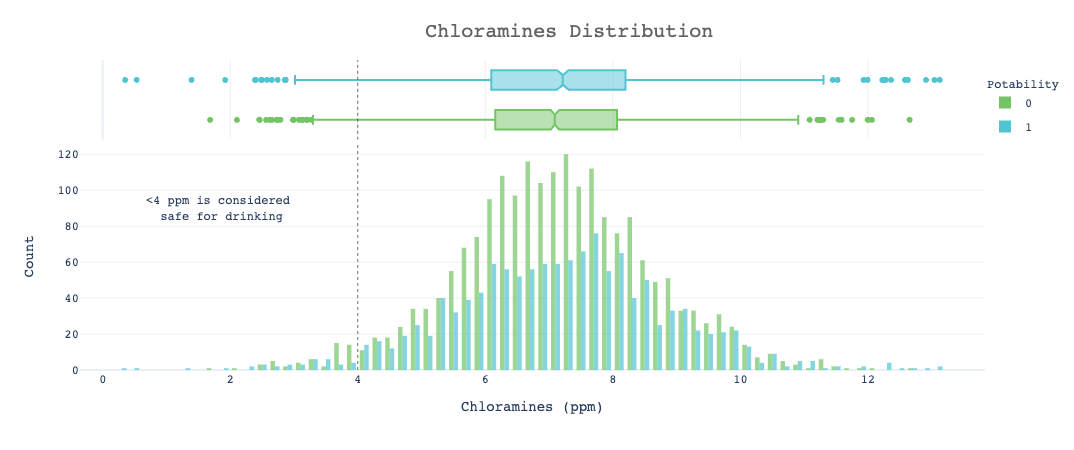

In [10]:
fig = px.histogram(df,x='Chloramines',y=Counter(df['Chloramines']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Sulfate**: Sulfate (SO4) can be found in almost all natural water. The origin of most sulfate compounds is the oxidation of sulfite ores, the presence of shales, or the industrial wastes.
Sulfate is one of the major dissolved components of rain. High concentrations of sulfate in the water we drink can have a laxative effect when combined with calcium and magnesium, the two most common constituents of hardness.

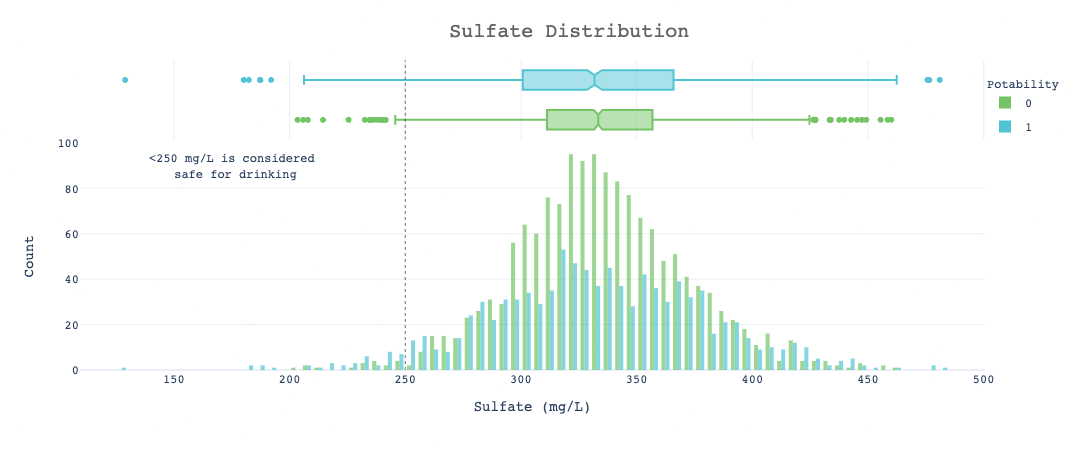

In [11]:
fig = px.histogram(df,x='Sulfate',y=Counter(df['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Conductivity**: Conductivity is a measure of the ability of water to pass an electrical current. Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases. Organic compounds like oil do not conduct electrical current very well and therefore have a low conductivity when in water. Conductivity is also affected by temperature: the warmer the water, the higher the conductivity.

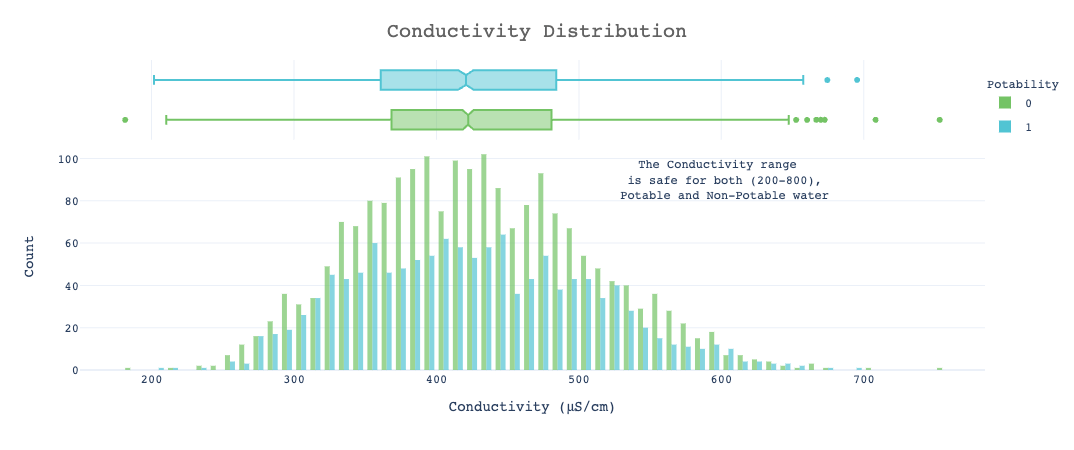

In [12]:
fig = px.histogram(df,x='Conductivity',y=Counter(df['Conductivity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Organic Carbon**: Organic contaminants (natural organic substances, insecticides, herbicides, and other agricultural chemicals) enter waterways in rainfall runoff. Domestic and industrial wastewaters also contribute organic contaminants in various amounts. As a result of accidental spills or leaks, industrial organic wastes may enter streams. Some of the contaminants may not be completely removed by treatment processes; therefore, they could become a problem for drinking water sources. It is important to know the organic content in a waterway.

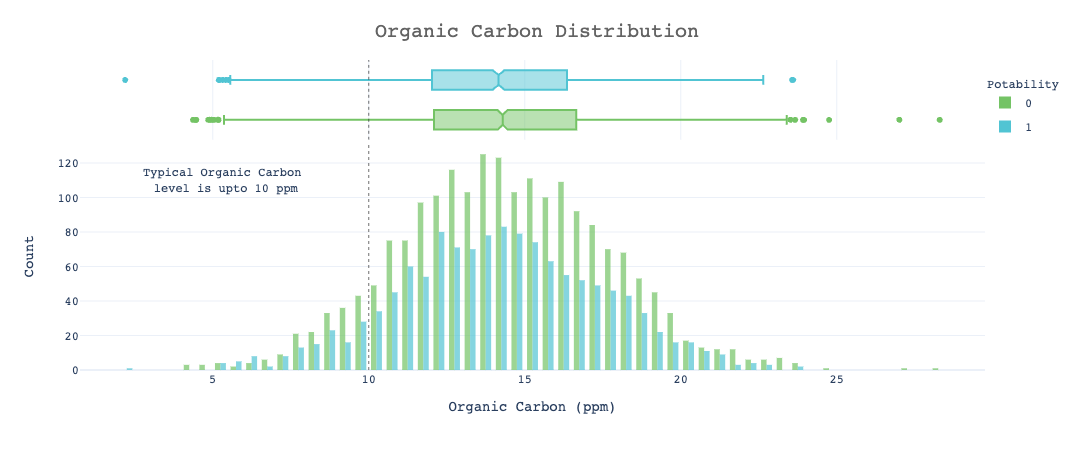

In [13]:
fig = px.histogram(df,x='Organic_carbon',y=Counter(df['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Trihalomethanes**: Trihalomethanes (THMs) are the result of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water. At elevated levels, THMs have been associated with negative health effects such as cancer and adverse reproductive outcomes.

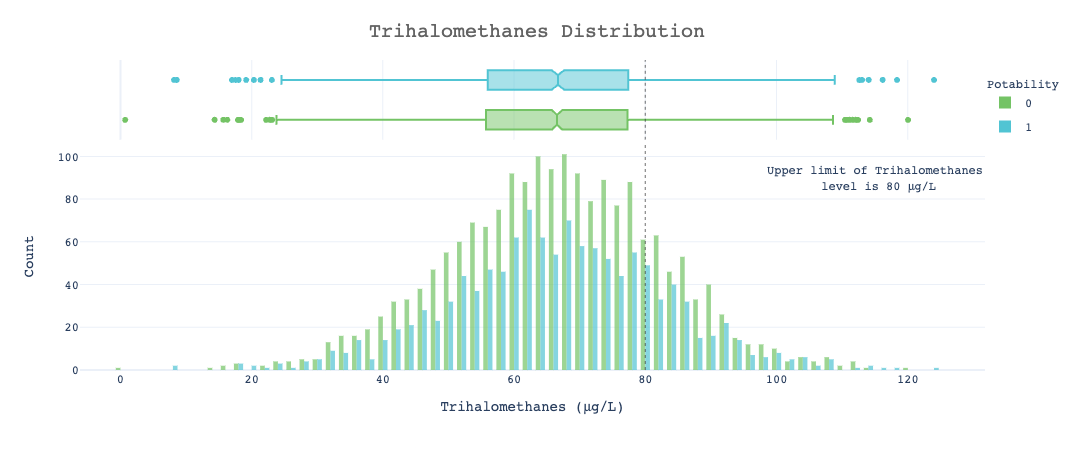

In [14]:
fig = px.histogram(df,x='Trihalomethanes',y=Counter(df['Trihalomethanes']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Turbidity**: Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms.

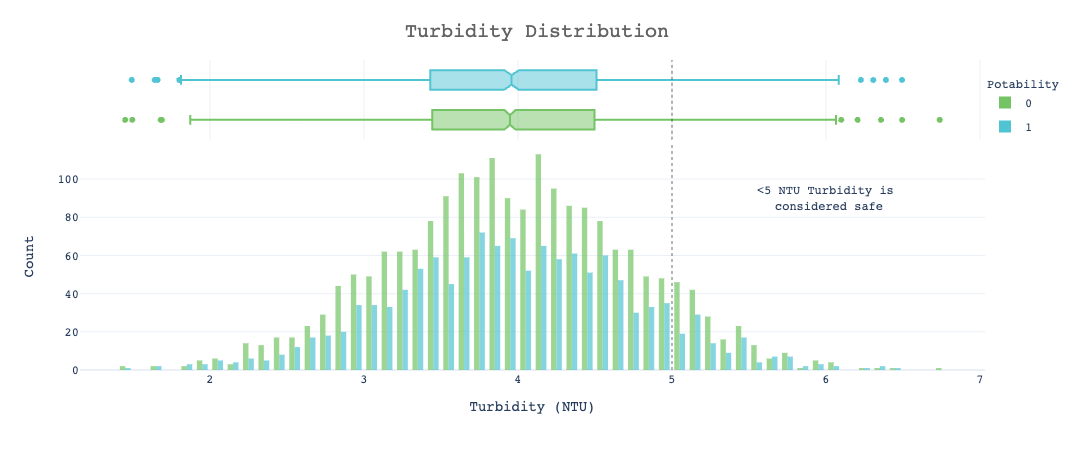

In [15]:
fig = px.histogram(df,x='Turbidity',y=Counter(df['Turbidity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_green[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Scatter Plot Matrix helps in finding out the correlation between all the features.

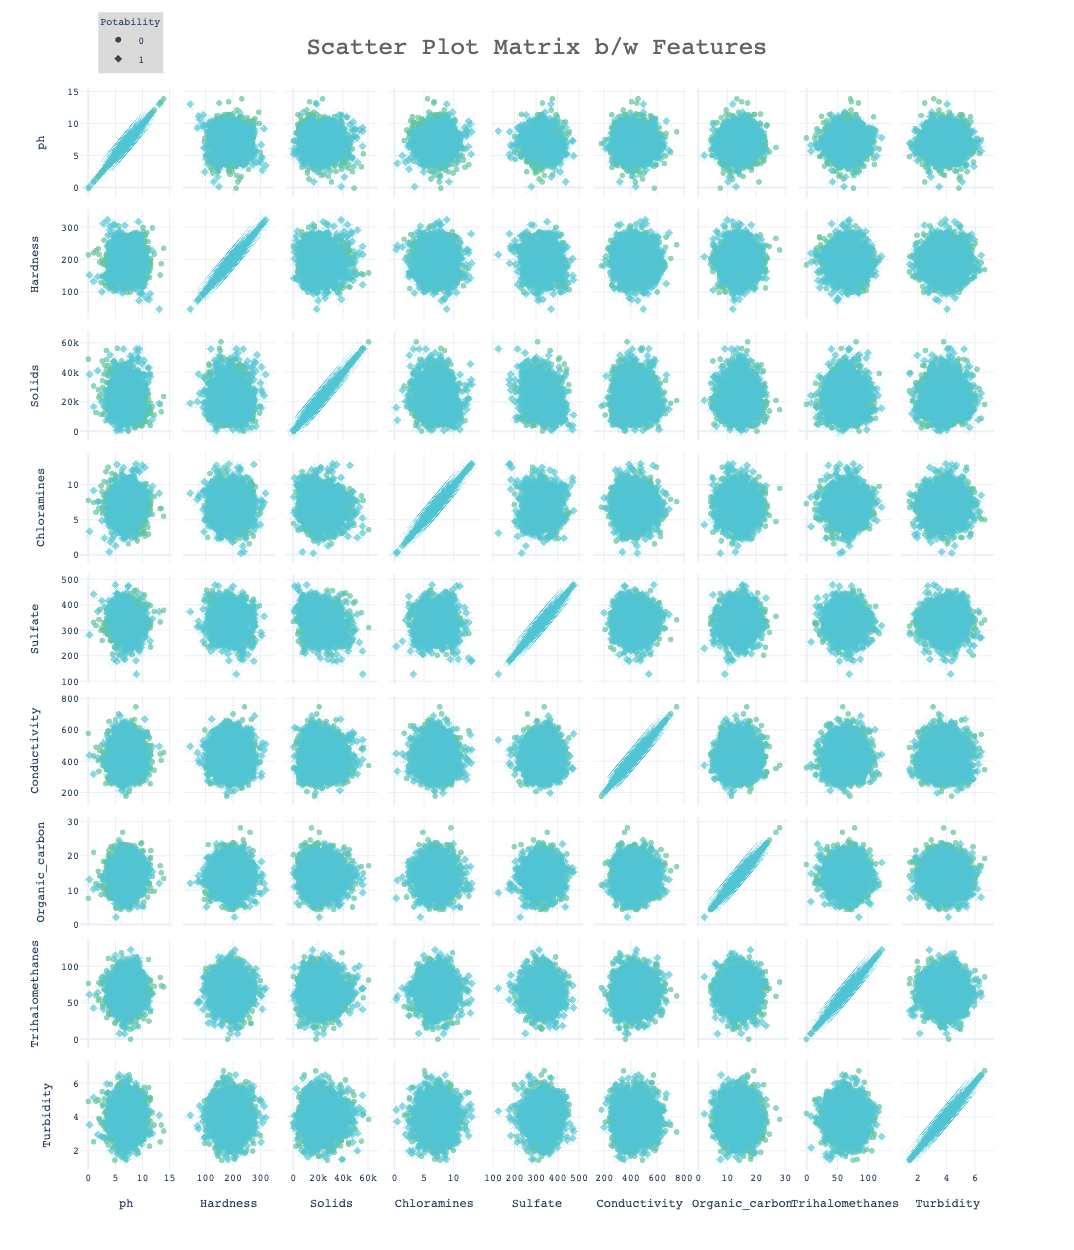

In [16]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_blue[3],colors_green[3]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_green[3],colors_blue[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

As we can see, there seems to be very less correlation between all the features.

In [17]:
cor=df.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

Let's make a Heatmap to visualize the correlation.

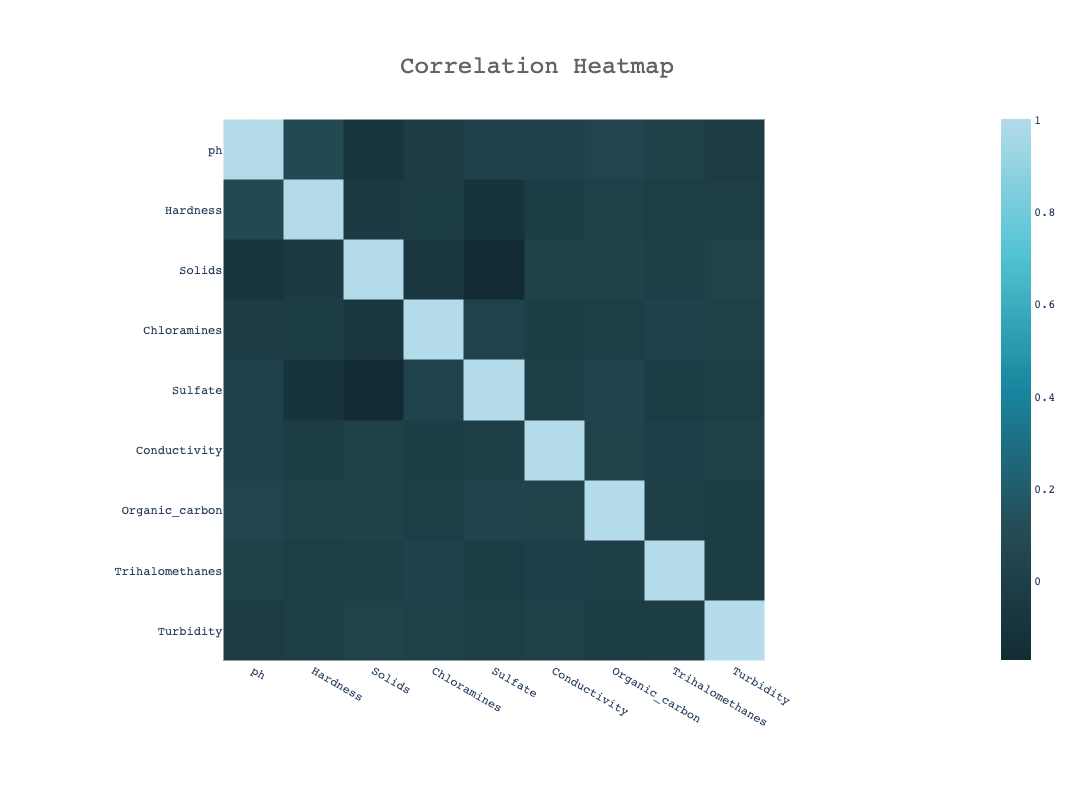

In [18]:
fig = px.imshow(cor,height=800,width=800,color_continuous_scale=colors_blue,template='plotly_white')

fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Data Preparation</center></h1>
</div>

<div style="background-color:#B4DBE9; color:#636363;">
    <h3><center>Dealing With Missing Values</center></h3>
</div>

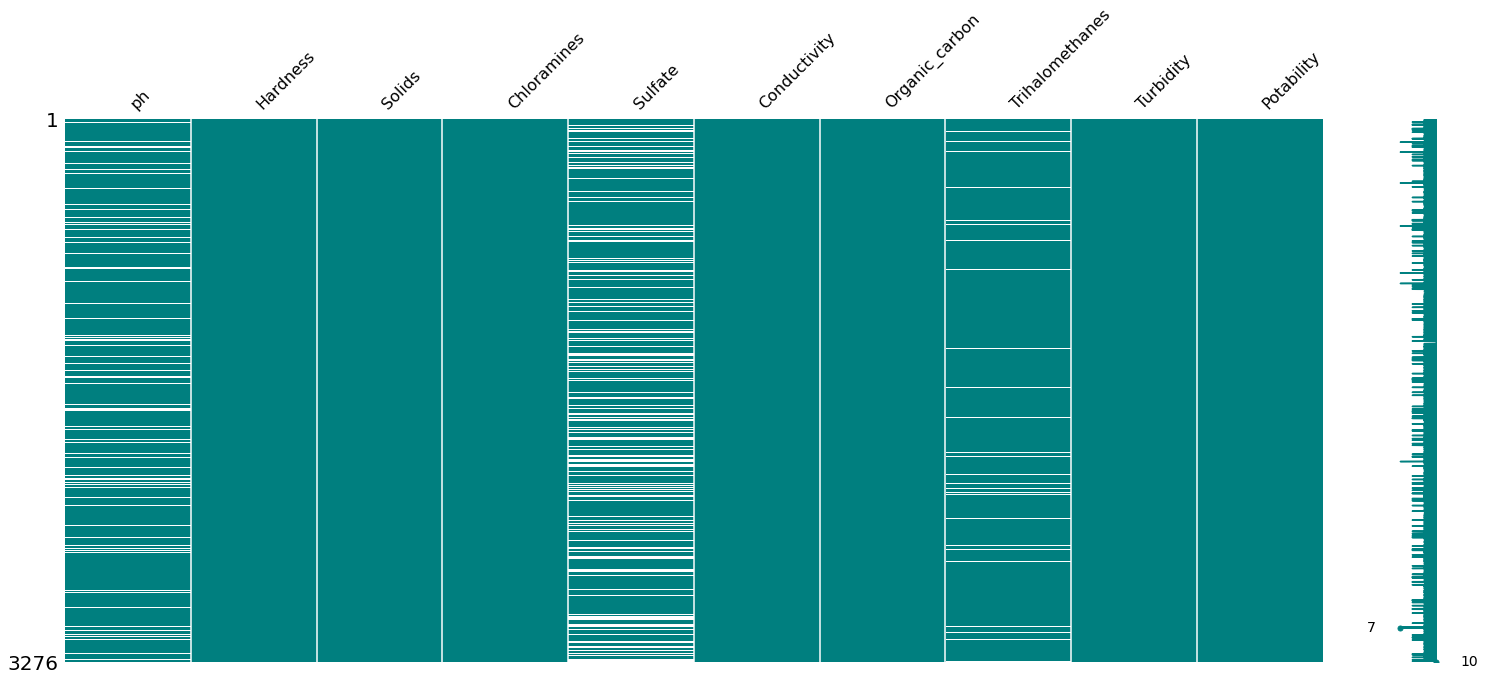

In [19]:
fig = msno.matrix(df,color=(0,0.5,0.5))

We can see that there are many missing values in the dataset, so I'll try to deal with it

In [20]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
df[df['Potability']==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [22]:
df[df['Potability']==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [23]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [24]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

We can see that the difference between the mean and median values of Potable and Non-Potable Water is minimal.
So we use the overall median of the feature to impute the values

In [25]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [26]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<div style="background-color:#B4DBE9; color:#636363;">
    <h3><center>Standardizing The Data</center></h3>
</div>

In [27]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Modelling</center></h1>
</div>

<div style="background-color:#B4DBE9; color:#636363;">
    <h3><center>Spot Checking</center></h3>
</div>

Spot checking is a great method to find out the baseline models for our data. It's quite easy and takes really less time.

In [30]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [31]:
finalResults

[('SVC', 0.6966295854853661),
 ('RF', 0.6590467652771552),
 ('NuSVC', 0.6440140356441925),
 ('XGB', 0.6432530207655018),
 ('SGDC', 0.6249612583294593),
 ('GNB', 0.611372136512389),
 ('KNN', 0.610276073619632),
 ('DTC', 0.5771142694616371),
 ('ADA', 0.5600032379487594),
 ('Perc', 0.5166988189308038),
 ('PAC', 0.5006454963644458),
 ('NC', 0.4991565832435637),
 ('LR', 0.30671414038657174),
 ('Ridge', 0.30671414038657174),
 ('BNB', 0.30671414038657174)]

I chose the top 5 baseline models and performed Hyperparameter tuning to it.
2 models outshined other models and they were Random Forest and XGBoost so I choose them for my final model.

<div style="background-color:#B4DBE9; color:#636363;">
    <h3><center>Hyperparameter Tuning</center></h3>
</div>

In [32]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

So now we have the best parameters for our final ensembled model.

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Final Model</center></h1>
</div>

I've used the VotingClassfier to ensemble the models for better results!

In [ ]:
param=data['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)    

In [ ]:
np.mean(accuracy)

I believe the features aren't proving much help to the model to distinguish between the 2 classes which is stopping the model to perform better.

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Conclusion</center></h1>
</div>

1. The TDS levels seem to contain some descripency since its values are on an average 40 folds more than the upper limit for safe drinking water.

2. The data contains almost equal number of acidic and basic pH level water samples.

3. 92% of the data was considered Hard. 

4. Only 2% of the water samples were safe in terms of Chloramines levels.

5. Only 1.8% of the water samples were safe in terms of Sulfate levels.

6. 90.6% of the water samples had higher Carbon levels than the typical Carbon levels in drinking water (10 ppm).

7. 76.6% of water samples were safe for drinking in terms of Trihalomethane levels in water.

8. 90.4% of the water samples were safe for drinking in terms of the Turbidity of water samples.

9. The correlation coefficients between the features were very low.

10. Random Forest and XGBoost worked the best to train the model.

11. The ensemble method of using the Voting Classfier on Stratified K-folded samples gave an accuracy of >64%

---

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><center>Thank You!</center></h1>
</div>